### Importações e Tratamento inicial dos dados

Do dataset foram removidos todos os dados cuja classificação é 'música', uma vez que não serão relevantes para qualquer análise posterior.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from collections import defaultdict

dataset = pd.read_csv('anime-dataset-2023.csv')
data = dataset.drop(dataset[dataset['Type'] == 'Music'].index)


### Quais gêneros são mais e menos encontrados entre os animes?


#### Resposta encontrada:
-  Mais comuns: Comédia, Fantasia e Ação
-  Menos comuns: Gourmet, Yuri e Erotico

,Genre,Qty
9,Comedy,7086
7,Fantasy,5201
0,Action,4664
3,Adventure,3819
2,Sci-Fi,3008
4,Drama,2765
10,Romance,1980
11,Slice of Life,1697
19,Hentai,1486
6,Supernatural,1451


<Axes: xlabel='Genre'>

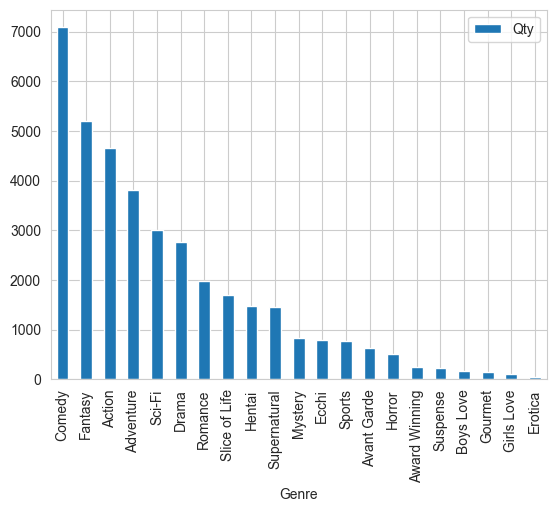

In [90]:
data_genres = data.loc[data['Genres'] != 'UNKNOWN']
anime_genres = data_genres['Genres'].values
dic = {}  

for genre in anime_genres:

    for each_one in genre.split(','):
        each_one = each_one.strip() 
        if not each_one in dic:
            dic[each_one] = 1   
        else:
            dic[each_one] += 1



df = pd.DataFrame(list(dic.items()), columns=['Genre', 'Qty'])

df = df.sort_values(by='Qty', ascending=False)
display(df)
df.plot(kind='bar', x='Genre')


### Quais são as estatísticas dos scores dos animes?

#### Interpretações:

Baseando-se nas estatísticas apresentadas, é notável que, na maioria dos casos, as pontuações não são muito altas. A análise da média, mediana e moda revela que as pontuações flutuam principalmente entre 6 e 6,5. Este fato é reforçado pelo desvio padrão ser menor do que 1 e pelo histograma mostrar a maior concentração de notas dentro dessa faixa.

O histograma também indica que há poucas notas que se afastam significativamente do valor de 6. No entanto, observa-se que há mais casos de notas mais altas do que mais baixas. Os valores mínimo e máximo mostram que há animes que se destacam da maioria, embora nenhum tenha recebido uma pontuação mínima de 0, que indicaria um completo desprezo, ou uma pontuação máxima de 10, que mostraria uma aceitação universal.

A conclusão a partir desses dados sugere que os otakus podem ser críticos severos em suas avaliações. Eles tendem a atribuir notas mais baixas, mas a maioria das avaliações se concentra em torno de uma nota de 6.

,Statistics,Value
0,Mean,6.435102
1,Median,6.45
2,Mode,"[6.31, 6.54]"
3,Minimum,1.85
4,Maximum,9.1
5,Standard deviation,0.928395


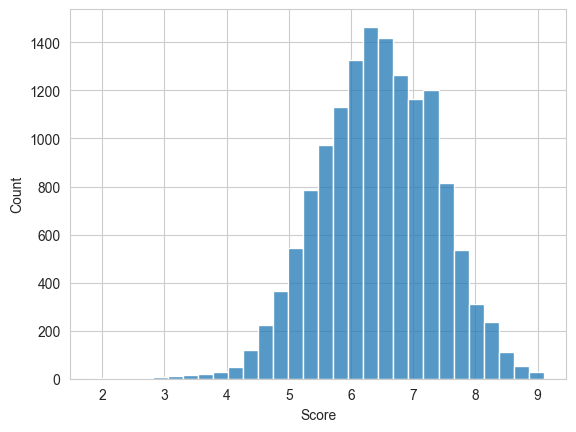

In [91]:
data_scores = data.loc[data['Score'] != 'UNKNOWN']
scores = data_scores['Score']
scores = scores.astype(float)

mean = scores.mean()
median = scores.median()
mode = scores.mode().values
minimum = scores.min()
maximum = scores.max()
std = scores.std()

statistics = {'Statistics': ['Mean', 'Median', 'Mode', 'Minimum', 'Maximum', 'Standard deviation'], 'Value': [mean, median, mode, minimum, maximum, std]}

df = pd.DataFrame(statistics)
display(df)

sns.set_style("whitegrid")
sns.histplot(scores, bins=30)
plt.show()  


### Quais são os animes que se encontram nos dois extremos de score?

#### Resposta encontrada:

-  O anime com o maior score: Fullmetal Alchemist: Brotherhood	
-  O anime com o menor score: Tenkuu Danzai Skelter+Heaven

In [92]:
data_scores = data.loc[data['Score'] != 'UNKNOWN']

scores = data_scores[['Name', 'Score']]

maximum = scores['Score'].max()
minimum = scores['Score'].min()

best_anime = scores.loc[scores['Score'] == maximum]
worst_anime = scores.loc[scores['Score'] == minimum]

display(best_anime, worst_anime)

,Name,Score
3961,Fullmetal Alchemist: Brotherhood,9.1


,Name,Score
2925,Tenkuu Danzai Skelter+Heaven,1.85


### Existe alguma correlação entre o número de episódios e a popularidade de um anime?

#### Interpretações:

Analisando o valor-p obtido, podemos rejeitar a hipótese nula de que não há nenhuma correlação entre a quantidade de episódios e a popularidade de um anime. No entanto, o coeficiente de Pearson, embora positivo, apresenta um valor relativamente baixo (0,153). Isso indica que, embora exista uma certa tendência de que animes com mais episódios tenham maior popularidade, essa relação não é um fator determinante.

A correlação positiva encontrada é moderada. Portanto, outros fatores, como a qualidade da história, a animação, os personagens, o marketing e a base de fãs, provavelmente têm uma influência muito mais significativa na popularidade dos animes do que a quantidade de episódios.

In [93]:
data_popularity = data.query("Episodes != 'UNKNOWN' and Popularity != 'UNKNOWN' and Type != 'Movie' ")

popularity = data_popularity[['Episodes', 'Popularity']].copy()
popularity['Episodes'] = pd.to_numeric(popularity['Episodes'], errors='coerce')
popularity['Popularity'] = pd.to_numeric(popularity['Popularity'], errors='coerce')

correlation, p_value = pearsonr(popularity['Episodes'], popularity['Popularity'])


pearson = {'Statistics': ['Correlation', 'P_Value'], 'Value': [correlation, p_value]}
df_pearson = pd.DataFrame(pearson)
display(df_pearson)

,Statistics,Value
0,Correlation,1.532442e-01
1,P_Value,4.255708e-91


### Os animes com maior pontuação (Score) também são os mais populares?

#### Interpretação

De forma surpreendente, não. A comparação demonstra apenas dois casos no qual o score apresentado mostrasse no mesmo rank que sua popularidade. Em grande maioria, há discrepâncias entre o rank de popularidade e o rank de scores, onde é notável casos no qual as posições não estão assim tão distantes, como apresentado por Fullmetal Alchemist: Brotherhood no qual ambos ranks estão presentes no top 3. Porém, também há casos com posições extremamente descrepantes, como Bleach: Sennen Kessen-hen o qual ocupa a segunda posição no score rank mas não chega nem mesmo ao top 100 em popularidade. Isso sugere que a popularidade não é um indicador direto da qualidade percebida de um anime, já que há casos em que animes altamente avaliados podem não ser tão populares e vice-versa.

A discrepância apresentada pode ser atribuída à natureza subjetiva das avaliações, onde a opinião de um grande número de espectadores pode resultar em uma média de pontuação mais equilibrada. Quanto mais pessoas assistem e avaliam um anime, maior é a variabilidade de opiniões, o que pode influenciar a pontuação média, mesmo que a qualidade do anime seja percebida como alta por uma parcela significativa dos espectadores.

In [94]:
data_compare = data.loc[data['Score'] != 'UNKNOWN']

data_compare = data_compare[['anime_id', 'Name', 'Popularity', 'Score']]


sorted_by_score = data_compare.sort_values(by='Score', ascending=False)
sorted_by_popularity= data_compare.sort_values(by='Popularity', ascending=True)

sorted_by_score['Score Rank'] = range(1, len(sorted_by_score) +1)
sorted_by_popularity['Popularity Rank'] = range(1, len(sorted_by_popularity) +1)

merged_data = pd.merge(sorted_by_score, sorted_by_popularity, on='anime_id')
merged_data['Same Position'] = merged_data['Score Rank'] == merged_data['Popularity Rank']

final_df = merged_data[['Name_x', 'Score Rank', 'Popularity Rank', 'Same Position']]
sm_df = final_df.loc[final_df['Same Position'] == True]

display(final_df)
display(sm_df)



,Name_x,Score Rank,Popularity Rank,Same Position
0,Fullmetal Alchemist: Brotherhood,1,3,False
1,Bleach: Sennen Kessen-hen,2,464,False
2,Steins;Gate,3,13,False
3,Gintama°,4,331,False
4,Shingeki no Kyojin Season 3 Part 2,5,24,False
...,...,...,...,...
14204,Kokuhaku,14205,6856,False
14205,Hametsu no Mars,14206,2481,False
14206,Tsui no Sora,14207,7292,False
14207,Utsu Musume Sayuri,14208,4387,False


,Name_x,Score Rank,Popularity Rank,Same Position
231,Spy x Family Part 2,232,232,True
13130,Bic Contact X Mameshiba Collab CM,13131,13131,True


### Quais são os gêneros com a maior pontuação (score) média?

#### Resposta:

Top 3 maiores:
-  Award Winning
-  Mystery
-  Suspense

Top 3 menores:
-  Erotica
-  Hentai
-  Avant Garde

#### Lógica aplicada:

O objetivo dessa análise foi determinar o valor médio do score de cada gênero de anime. Para isso, primeiramente, foram filtrados do dataset os animes cujo gênero ou score tinham o valor 'desconhecido'. Essa filtragem foi necessária para garantir a precisão da análise, o que explica a discrepância na quantidade de animes por gênero em comparação com a primeira questão.

Na etapa de análise, foram somados os scores dos animes que pertenciam a cada gênero específico. Em seguida, o total dessa soma foi dividido pelo número de animes que continham esse gênero, essa divisão proporcionou o valor médio do score para cada gênero

In [95]:
data_sg = data.query("Genres != 'UNKNOWN' and Score != 'UNKNOWN'")
 
sg_values = data_sg[['Score','Genres']].values
dic_scores = defaultdict(float)
dic_count = defaultdict(int)
dic_avarage = defaultdict()

for score, genres in sg_values:
    score = float(score)
    for genre in genres.split(','):
        genre = genre.strip() 
        dic_scores[genre] += score
        dic_count[genre] += 1



for genre in dic_scores.keys():
    average_score = f"{dic_scores[genre] / dic_count[genre]:.2f}"
    dic_avarage[genre] = average_score

count_df = pd.DataFrame(list(dic_count.items()), columns=['Genre', 'Qty'])
average_df = pd.DataFrame(list(dic_avarage.items()), columns=['Genre', 'Average'])

merged_sg = pd.merge(average_df, count_df, on='Genre')
merged_sg = merged_sg.sort_values(by='Average', ascending=False)
display(merged_sg)
    

,Genre,Average,Qty
1,Award Winning,7.30,214
5,Mystery,7.00,746
12,Suspense,6.96,186
4,Drama,6.86,2150
10,Romance,6.82,1782
6,Supernatural,6.76,1242
8,Sports,6.73,563
0,Action,6.68,3912
3,Adventure,6.68,2655
14,Gourmet,6.66,103


### Qual é a distribuição dos animes por classificação de faixa etária (Rating)?

,Rating,Qty
1,PG-13 - Teens 13 or older,7742
4,G - All Ages,5879
2,PG - Children,3985
5,Rx - Hentai,1475
0,R - 17+ (violence & profanity),1388
3,R+ - Mild Nudity,1106


<Axes: xlabel='Rating'>

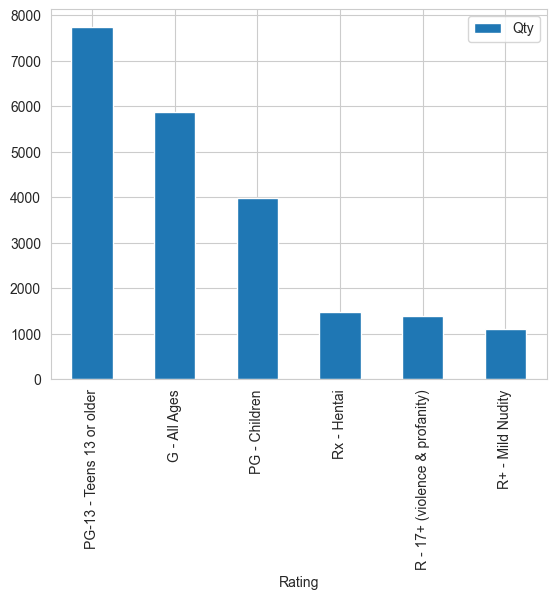

In [96]:
data_rating = data.query("Rating != 'UNKNOWN'")
ratings = data_rating['Rating']
dic_rating = defaultdict(int)

for rating in ratings:
    dic_rating[rating] += 1


rating_df = pd.DataFrame(list(dic_rating.items()), columns=['Rating', 'Qty'])
rating_df = rating_df.sort_values(by='Qty', ascending=False)

display(rating_df)
rating_df.plot(kind='bar', x='Rating')